In [45]:
import scipy.io as sio
from buildingspy.io.outputfile import Reader
import matplotlib.pyplot as plt
import numpy as np

# Introduction

#### Aim

Debug the problems encountered with pre-processing. When we change the simulation time and number of periods, myfft returns weird values.

In [2]:
sim = sio.loadmat('/media/maousi/Data/tmp/OM_Simulation_T30_N2000_2020_03_25/outputs/Ursino1998Model_VAD2_output_9.mat')

In [ ]:
r = Reader('/media/maousi/Data/tmp/OM_Simulation_T30_N2000_2020_03_25/outputs/Ursino1998Model_VAD2_output_9.mat', 'dymola')

In [25]:
(t, psysarteries) = r.values('SystemicArteries.PC')

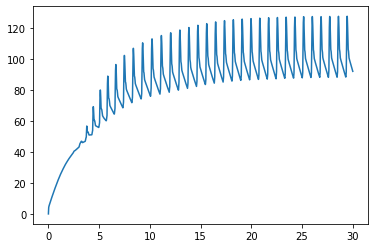

In [32]:
plt.plot(t, psysarteries);

In [33]:
r2 = Reader('/media/maousi/Data/tmp/OM_Simulation_T30_N2000_2020_03_25/outputs/Ursino1998Model_VAD2_output_350.mat', 'dymola')

In [57]:
(t2, psysart2) = r2.values('SystemicArteries.PC')

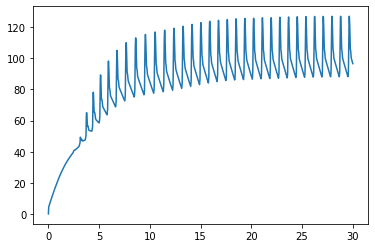

In [35]:
plt.plot(t2, psysart2)

In [36]:
t.shape

(3196,)

In [37]:
t2.shape

(3216,)

In [65]:
tsubmin, tsubmax = 20, 30
dt = 0.015

In [52]:
indices = np.where(np.logical_and(t >= tsubmin, t <= tsubmax))

In [48]:
signal = psysarteries[indices]
t = t[indices]

In [49]:
signal.shape

(1130,)

In [50]:
t.shape

(1130,)

In [53]:
indices2 = np.where(np.logical_and(t2 >= tsubmin, t2 <= tsubmax))

In [58]:
signal2 = psysart2[indices2]
t2 = t2[indices2]

In [78]:
signal2.shape

(1148,)

In [59]:
t2.shape

(1148,)

In [60]:
t[:10]

array([20.01      , 20.025     , 20.04      , 20.04850659, 20.04850659,
       20.055     , 20.07      , 20.07068653, 20.07068653, 20.07782195])

In [61]:
t2[:10]

array([20.01      , 20.025     , 20.04      , 20.055     , 20.05614667,
       20.05614667, 20.06447373, 20.06447373, 20.07      , 20.08433407])

In [63]:
# Performmyfftonsignal
tcopy = t - t[0]
tcopy2 = t2 - t2[0]

In [71]:
ids = np.where(np.abs(tcopy / dt - np.round(tcopy / dt)) < 1e-12)

In [79]:
ids2 = np.where(np.abs(tcopy2 / dt - np.round(tcopy2 / dt)) < 1e-12)

In [77]:
ids[0].shape

(668,)

In [80]:
ids2[0].shape

(668,)

In [81]:
t = t[ids]
t2 = t2[ids]

In [82]:
psysateries = psysarteries[ids]

In [83]:
psysart2 = psysart2[ids2]

In [102]:
len(t)

668

In [100]:
t[:20]

array([20.01 , 20.025, 20.04 , 20.055, 20.07 , 20.085, 20.1  , 20.115,
       20.13 , 20.145, 20.16 , 20.175, 20.19 , 20.205, 20.22 , 20.235,
       20.25 , 20.265, 20.28 , 20.295])

In [106]:
u, ui = np.unique(t, return_index=True)

In [107]:
u[:20]

array([20.01 , 20.025, 20.04 , 20.055, 20.07 , 20.085, 20.1  , 20.115,
       20.13 , 20.145, 20.16 , 20.175, 20.19 , 20.205, 20.22 , 20.235,
       20.25 , 20.265, 20.28 , 20.295])

In [109]:
ui[:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [103]:
len(np.unique(t))

667